<a href="https://colab.research.google.com/github/jwym02/data-vibes/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import networkx as nx
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [ ]:
# Download necessary NLTK data files (if not already available)
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Load the first Excel file
wikileaks_path = "wikileaks_parsed.xlsx"
wikileaks_df = pd.read_excel(wikileaks_path)

# Load the second Excel file
news_path = "news_excerpts_parsed.xlsx"
news_df = pd.read_excel(news_path)

In [ ]:
# Display a summary of both datasets to understand their structure and content
wikileaks_summary = wikileaks_df.head()
news_excerpts_summary = news_df.head()


In [ ]:
wikileaks_summary
news_excerpts_summary

,Link,Text
0,https://edition.cnn.com/2023/09/29/business/st...,Starbucks violated federal labor law when it i...
1,https://www.channelnewsasia.com/singapore/su-w...,The first suspect to plead guilty in Singapore...
2,https://edition.cnn.com/2023/05/22/tech/meta-f...,Meta has been fined a record-breaking €1.2 bil...
3,https://www.channelnewsasia.com/singapore/bill...,SINGAPORE: A 45-year-old man linked to Singapo...
4,https://edition.cnn.com/2024/03/05/politics/li...,The Department of Education imposed a record $...


Preprocessing


In [ ]:
# Preprocessing function
def preprocess_text(text):
    # Remove non-alphanumeric characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    return text

# Apply preprocessing steps
wikileaks_df['Cleaned_Text'] = wikileaks_df['Text'].apply(preprocess_text)
news_df['Cleaned_Text'] = news_df['Text'].apply(preprocess_text)

# Remove duplicates and empty rows
wikileaks_df = wikileaks_df.drop_duplicates(subset=['Cleaned_Text']).dropna(subset=['Cleaned_Text'])
news_df = news_df.drop_duplicates(subset=['Cleaned_Text']).dropna(subset=['Cleaned_Text'])

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization function
def lemmatize_text(text):
    words = text.split()
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)

# Apply lemmatization to the cleaned text
wikileaks_df['Lemmatized_Text'] = wikileaks_df['Cleaned_Text'].apply(lemmatize_text)
news_df['Lemmatized_Text'] = news_df['Cleaned_Text'].apply(lemmatize_text)



In [ ]:
# Display the lemmatized data for review
print("Lemmatized Wikileaks Data:")
print(wikileaks_df.head())  # Displays the first 5 rows of the DataFrame

print("\nLemmatized News Data:")
print(news_df.head())  # Displays the first 5 rows of the DataFrame


Lemmatized Wikileaks Data:
  PDF Path                                               Text  \
0    1.pdf  Pristina Airport – Possible administrative irr...   
1    1.pdf  Investigative details\n\nIn his/her interviews...   
2   10.pdf  "An interoffice memorandum providing an “outst...   
3   10.pdf  "Allegation 2 & 3:\n\n(Specifically, three of ...   
4   10.pdf  "When asked about this in interview, the Divis...   

                                        Cleaned_Text  \
0  pristina airport  possible administrative irre...   
1  investigative details\n\nin hisher interviews ...   
2  an interoffice memorandum providing an outstan...   
3  allegation   \n\nspecifically three of the per...   
4  when asked about this in interview the divisio...   

                                     Lemmatized_Text  
0  pristina airport possible administrative irreg...  
1  investigative detail in hisher interview condu...  
2  an interoffice memorandum providing an outstan...  
3  allegation specificall

In [ ]:
# Replace '\n\n' and '\n' with a space
wikileaks_df['Cleaned_Text'] = wikileaks_df['Cleaned_Text'].str.replace(r'\n+', ' ', regex=True)
news_df['Cleaned_Text'] = news_df['Cleaned_Text'].str.replace(r'\n+', ' ', regex=True)


In [ ]:
print(wikileaks_df['Cleaned_Text'].head())
print(news_df['Cleaned_Text'].head())

0    pristina airport  possible administrative irre...
1    investigative details in hisher interviews con...
2    an interoffice memorandum providing an outstan...
3    allegation    specifically three of the person...
4    when asked about this in interview the divisio...
Name: Cleaned_Text, dtype: object
0    starbucks violated federal labor law when it i...
1    the first suspect to plead guilty in singapore...
2    meta has been fined a recordbreaking  billion ...
3    singapore a yearold man linked to singapores l...
4    the department of education imposed a record  ...
Name: Cleaned_Text, dtype: object


In [ ]:
from nltk.corpus import stopwords

# Download the stop words set
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Add custom stopwords to the existing stop words set
custom_stop_words = {
       "january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december",
    "year", "years", "week", "weeks", "day", "days", "month", "months",
    "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten",
    "first", "second", "third",
    "united", "nations", "committee", "report", "review", "internal", "official", "officer", "program", "project",
    "airport", "terminal", "location", "place", "zone",
    "approximately", "next", "prior", "details", "percent", "inclusive",
    # New additions
    "summer", "winter", "fall", "spring",
    "memo", "dra", "control", "panel", "annual", "result",
    "us", "uk", "eu", "board", "group", "provisional",
    "department", "infrastructure", "agency"
}
stop_words.update(custom_stop_words)

# Function to remove stop words
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply to the cleaned text column
wikileaks_df['Text_No_Stopwords'] = wikileaks_df['Cleaned_Text'].apply(remove_stopwords)
news_df['Text_No_Stopwords'] = news_df['Cleaned_Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(wikileaks_df[['Cleaned_Text', 'Text_No_Stopwords']].head())
print(news_df[['Cleaned_Text', 'Text_No_Stopwords']].head())

                                        Cleaned_Text  \
0  pristina airport  possible administrative irre...   
1  investigative details in hisher interviews con...   
2  an interoffice memorandum providing an outstan...   
3  allegation    specifically three of the person...   
4  when asked about this in interview the divisio...   

                                   Text_No_Stopwords  
0  pristina possible administrative irregularity ...  
1  investigative hisher interviews conducted st t...  
2  interoffice memorandum providing outstanding i...  
3  allegation specifically persons bid opening ev...  
4  asked interview divisional manager stated with...  
                                        Cleaned_Text  \
0  starbucks violated federal labor law when it i...   
1  the first suspect to plead guilty in singapore...   
2  meta has been fined a recordbreaking  billion ...   
3  singapore a yearold man linked to singapores l...   
4  the department of education imposed a record  ... 

In [ ]:
import spacy
from itertools import combinations
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Function to extract entities
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

# Function to extract relationships (co-occurrence of entities)
def extract_relationships(text):
    entities = extract_entities(text)
    return list(combinations(entities, 2)) if len(entities) > 1 else []

# Apply entity and relationship extraction to the dataset
wikileaks_df['Relationships'] = wikileaks_df['Text_No_Stopwords'].apply(extract_relationships)

In [ ]:
from itertools import combinations
import pandas as pd

# Sample function to extract relationships based on co-occurrence
def extract_relationships(text, entities):
    # Find all entity pairs
    entity_pairs = list(combinations(entities, 2))
    return entity_pairs

# Example data for entities (mock entity extraction)
entities = ["airport", "administrative", "division"]

# Apply to the dataset
wikileaks_df['Relationships'] = wikileaks_df['Text_No_Stopwords'].apply(
    lambda x: extract_relationships(x, entities)  # Replace `entities` with actual entity extraction logic
)


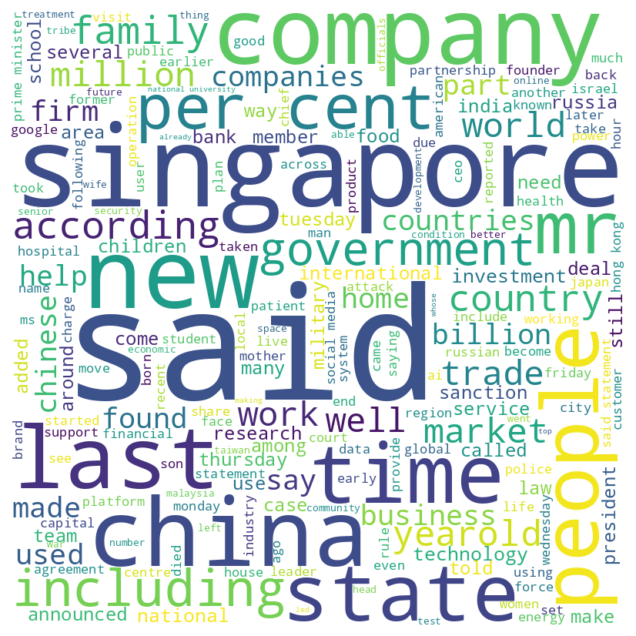

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
all_text = " ".join(news_df['Text_No_Stopwords'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

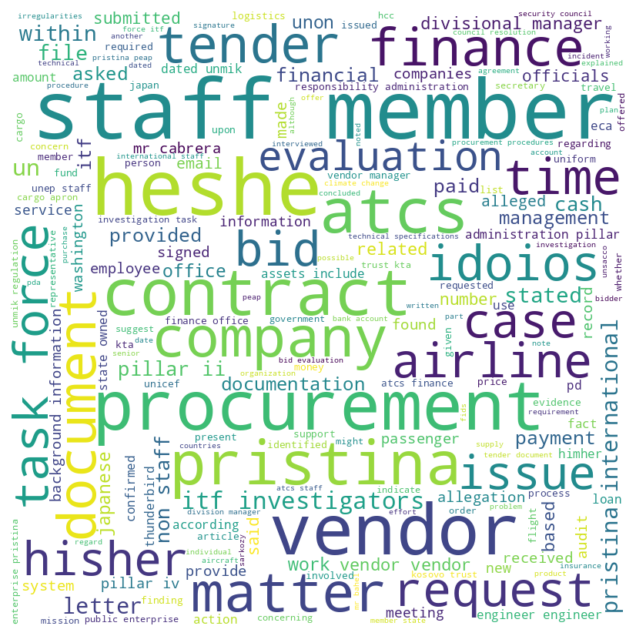

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
all_text = " ".join(wikileaks_df['Text_No_Stopwords'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Function to calculate polarity and subjectivity
def analyze_sentiment(text):
    blob = TextBlob(text)
    return pd.Series({'polarity': blob.sentiment.polarity,
                      'subjectivity': blob.sentiment.subjectivity})

# Apply the function to the DataFrame
news_df[['polarity', 'subjectivity']] = news_df['Text_No_Stopwords'].apply(analyze_sentiment)

# Display the DataFrame
print(news_df)

                                                   Link  \
0     https://edition.cnn.com/2023/09/29/business/st...   
1     https://www.channelnewsasia.com/singapore/su-w...   
2     https://edition.cnn.com/2023/05/22/tech/meta-f...   
3     https://www.channelnewsasia.com/singapore/bill...   
4     https://edition.cnn.com/2024/03/05/politics/li...   
...                                                 ...   
1504  https://www.channelnewsasia.com/commentary/mal...   
1505  https://www.channelnewsasia.com/singapore/tick...   
1506     https://www.bbc.com/news/world-europe-57965260   
1507  https://www.bbc.com/news/uk-wales-mid-wales-13...   
1508  https://www.straitstimes.com/singapore/parliam...   

                                                   Text  \
0     Starbucks violated federal labor law when it i...   
1     The first suspect to plead guilty in Singapore...   
2     Meta has been fined a record-breaking €1.2 bil...   
3     SINGAPORE: A 45-year-old man linked to Singapo...

In [ ]:
# Function to calculate polarity and subjectivity
def analyze_sentiment(text):
    blob = TextBlob(text)
    return pd.Series({'polarity': blob.sentiment.polarity,
                      'subjectivity': blob.sentiment.subjectivity})

# Apply the function to the DataFrame
wikileaks_df[['polarity', 'subjectivity']] = wikileaks_df['Text_No_Stopwords'].apply(analyze_sentiment)

# Display the DataFrame
print(wikileaks_df)

    PDF Path                                               Text  \
0      1.pdf  Pristina Airport – Possible administrative irr...   
1      1.pdf  Investigative details\n\nIn his/her interviews...   
2     10.pdf  "An interoffice memorandum providing an “outst...   
3     10.pdf  "Allegation 2 & 3:\n\n(Specifically, three of ...   
4     10.pdf  "When asked about this in interview, the Divis...   
..       ...                                                ...   
138   89.pdf  "Description\n\nTop Secret US National Securit...   
139    9.pdf  "INTRODUCTION\n\nThis case arises out of an au...   
140    9.pdf  "BACKGROUND INFORMATION\n\nPristina Internatio...   
141    9.pdf  "BACKGROUND INFORMATION\n\nPristina Internatio...   
142   91.pdf  "Description\n\nInterception of French Ambassa...   

                                          Cleaned_Text  \
0    pristina airport  possible administrative irre...   
1    investigative details in hisher interviews con...   
2    an interoffice m

In [ ]:
wikileaks_df.columns

Index(['PDF Path', 'Text', 'Cleaned_Text', 'Lemmatized_Text',
       'Text_No_Stopwords', 'Relationships', 'polarity', 'subjectivity'],
      dtype='object')

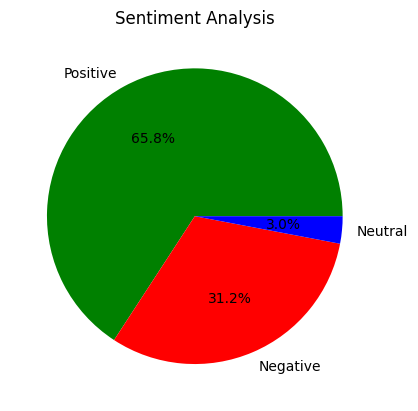

In [ ]:
import matplotlib.pyplot as plt

# Calculate sentiment scores for each row
news_df['sentiment_score'] = news_df['Text_No_Stopwords'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Count the number of positive, negative, and neutral sentiments
pos = (news_df['sentiment_score'] > 0).sum()
neg = (news_df['sentiment_score'] < 0).sum()
neu = (news_df['sentiment_score'] == 0).sum()

# Generate a pie chart
plt.pie(
    [pos, neg, neu],
    labels=['Positive', 'Negative', 'Neutral'],
    autopct='%1.1f%%',
    colors=['green', 'red', 'blue']
)
plt.title('Sentiment Analysis')
plt.show()


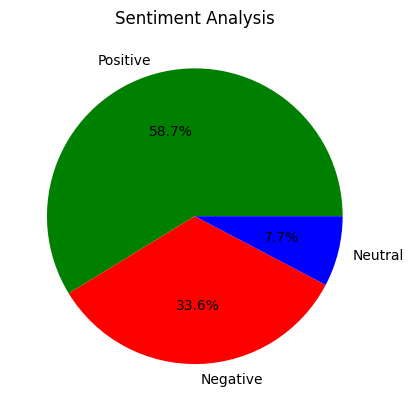

In [ ]:
# Calculate sentiment scores for each row
wikileaks_df['sentiment_score'] = wikileaks_df['Text_No_Stopwords'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Count the number of positive, negative, and neutral sentiments
pos = (wikileaks_df['sentiment_score'] > 0).sum()
neg = (wikileaks_df['sentiment_score'] < 0).sum()
neu = (wikileaks_df['sentiment_score'] == 0).sum()

# Generate a pie chart
plt.pie(
    [pos, neg, neu],
    labels=['Positive', 'Negative', 'Neutral'],
    autopct='%1.1f%%',
    colors=['green', 'red', 'blue']
)
plt.title('Sentiment Analysis')
plt.show()

In [ ]:
news_df.to_csv('news_cleaned.csv', index=False)
wikileaks_df.to_csv('wikileaks_cleaned.csv', index=False)